# Libraries and versions

In [1]:
python_version = !python -V #version 3.7.9
import pandas as pd #version 1.2.4
import numpy as np #version 1.20.1
import seaborn as sns #version 0.11.0
import matplotlib as plt #version 3.3.3
from datetime import date as dt

#Modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

#Visualização
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [2]:
print(f'Python version - {python_version[0][7:]}')
print(f'Pandas version - {pd.__version__}')
print(f'Numpy version - {np.__version__}')
print(f'Seaborn version - {sns.__version__}')
print(f'Matplotlib version - {plt.__version__}')

Python version - 3.7.9
Pandas version - 1.2.4
Numpy version - 1.20.1
Seaborn version - 0.11.0
Matplotlib version - 3.3.3


# Configurations

## Pandas

In [3]:
#apresentará 500 colunas e linhas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)

## Seaborn

In [4]:
sns.set_palette('inferno')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None, colors=None):
    graphic_object.figure.set_size_inches(15,4)
    graphic_object.set_title(title, color=colors, fontsize=16)
    graphic_object.set_xlabel(xlabel, color=colors, fontsize=14)
    graphic_object.set_ylabel(ylabel, color=colors, fontsize=14)
    graphic_object = graphic_object

## Warnings

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Base

In [6]:
bvsp = pd.read_csv('BVSP_tratado.csv')
bvsp.head()

,date,open,high,low,close,year,month,day
0,1993-04-27,24.799999,25.400000,24.500000,24.500000,1993,4,27
1,1993-04-28,24.500000,24.600000,23.700001,24.299999,1993,4,28
2,1993-04-29,24.299999,24.799999,23.700001,23.700001,1993,4,29
3,1993-04-30,23.700001,24.200001,23.700001,24.100000,1993,4,30
4,1993-05-03,24.100000,24.400000,23.799999,24.100000,1993,5,3


### Informações

In [7]:
bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116 entries, 0 to 7115
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7116 non-null   object 
 1   open    7116 non-null   float64
 2   high    7116 non-null   float64
 3   low     7116 non-null   float64
 4   close   7116 non-null   float64
 5   year    7116 non-null   int64  
 6   month   7116 non-null   int64  
 7   day     7116 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 444.9+ KB


### Transformar índice em data

In [8]:
#transforma coluna em data
bvsp['date'] = pd.to_datetime(bvsp['date'])

#transforma o índice em data
bvsp.set_index('date', inplace=True)

## Objetivo 1

- utilizando-se dos dados de abertura prever o fechamento, baixa e alta

### Fechamento

#### Modelagem dos dados

In [9]:
#Cria novo DataFrame
prev_close = bvsp[['open', 'close']]

#cria variação de open
prev_close['var_open'] = prev_close['open'].diff(1)

#cria media movel 3, 5, 15 e 30 dias
prev_close['moving_3_avg'] = prev_close['open'].rolling(3).mean()
prev_close['moving_5_avg'] = prev_close['open'].rolling(5).mean()
prev_close['moving_15_avg'] = prev_close['open'].rolling(15).mean()
prev_close['moving_30_avg'] = prev_close['open'].rolling(30).mean()

prev_close.dropna(inplace=True)

prev_close

,open,close,var_open,moving_3_avg,moving_5_avg,moving_15_avg,moving_30_avg
date,,,,,,,
1993-06-07,41.000000,42.200001,-0.099998,40.533333,38.96,34.780000,30.050000
1993-06-08,42.400002,42.200001,1.400002,41.500000,40.36,35.653334,30.636667
1993-06-09,42.200001,41.500000,-0.200001,41.866668,41.24,36.500001,31.226667
1993-06-10,42.200001,41.500000,0.000000,42.266668,41.78,37.320001,31.823334
1993-06-11,44.599998,44.900002,2.399997,43.000000,42.48,38.160000,32.520000
...,...,...,...,...,...,...,...
2021-05-10,122038.000000,121909.000000,2116.000000,120512.333333,119694.20,120035.800000,118698.233333
2021-05-11,121904.000000,122964.000000,-134.000000,121288.000000,120233.20,120088.333333,118970.033333
2021-05-12,122964.000000,119710.000000,1060.000000,122302.000000,121281.00,120224.266667,119242.966667


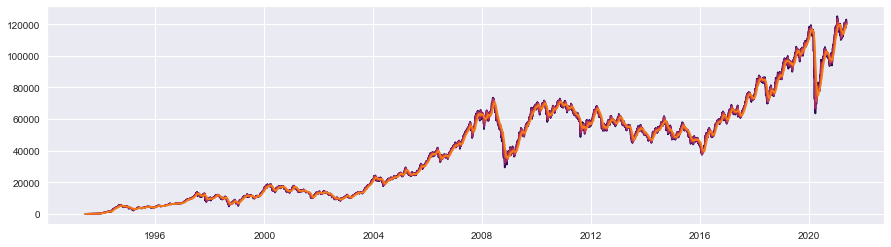

In [10]:
g4 = sns.lineplot(x=prev_close.index, y=prev_close['open'])
g4 = sns.lineplot(x=prev_close.index, y=prev_close['moving_3_avg'])
g4 = sns.lineplot(x=prev_close.index, y=prev_close['moving_5_avg'])
g4 = sns.lineplot(x=prev_close.index, y=prev_close['moving_15_avg'])
g4 = sns.lineplot(x=prev_close.index, y=prev_close['moving_30_avg'])
configuration(g4)

### X e y

- os dados de treino irão até o último dia de 2020
- dados de validação serão os de 2021

##### Treino

In [11]:
X_treino_close = prev_close.loc[:'2020-12-30'].drop(columns=['close'])
y_treino_close = prev_close.loc[:'2020-12-30']['close']

##### Validação

In [12]:
X_val_close = prev_close.loc['2021-01-04':].drop(columns=['close'])
y_val_close = prev_close.loc['2021-01-04':]['close']

##### Modelo

In [14]:
mdl_prev_close = RandomForestRegressor(n_estimators=1000)
mdl_prev_close.fit(X_treino_close, y_treino_close)
y_previsao_close = mdl_prev_close.predict(X_val_close)
erro = mean_squared_log_error(y_val_close, y_previsao_close)
print(erro)

0.0006147673072643537


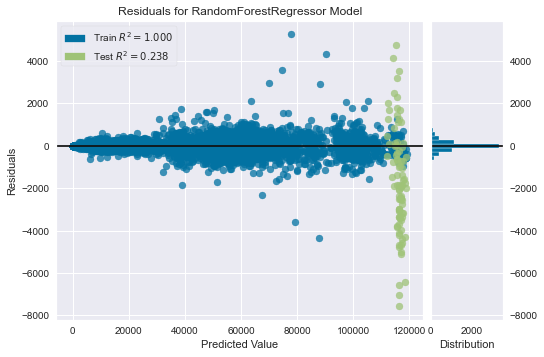

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
residuos = ResidualsPlot(mdl_prev_close)
residuos.fit(X_treino_close, y_treino_close)
residuos.score(X_val_close, y_val_close)
residuos.show()

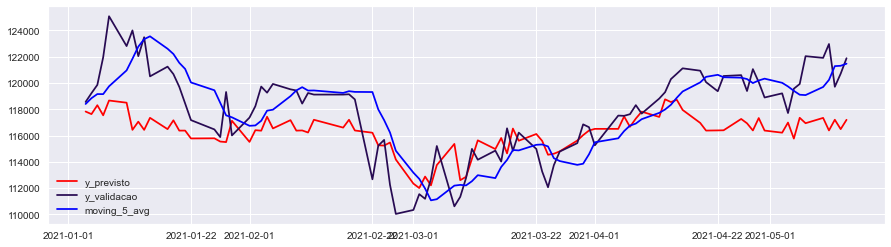

In [24]:
g5 = sns.lineplot(x=X_val_close.index.values, y=y_previsao_close, label='y_previsto', color='red')
g5 = sns.lineplot(x=X_val_close.index.values, y=y_val_close, label='y_validacao')
g5 = sns.lineplot(x=X_val_close.index.values, y=prev_close.loc['2021-01-04':]['moving_5_avg'], label='moving_5_avg',
                 color='blue')
configuration(g5)

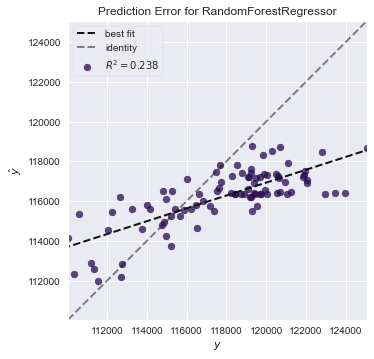

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [17]:
residuos = PredictionError(mdl_prev_close)
residuos.fit(X_treino_close, y_treino_close)
residuos.score(X_val_close, y_val_close)
residuos.show()

In [21]:
erro = mean_squared_log_error(y_val_close,prev_close.loc['2021-01-04':]['moving_5_avg'])
print(erro)

0.00028241087676262705
